# Assignment 3

Due: September 24

Name: Eric Wu

In [3]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import sys

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CDS411')

import schelling as sch

## make sure to use the functions within schelling.py as a starting point

## Problem 1

In a 2D simulation, each cell has 8 neighbors (excluding those along the perimeter of the environment).  Consider a 3D environment which has 100 cells in the vertical dimension, 100 cells in the horizontal dimension, and 100 cells in the depth dimension.  How many neighbors does a cell have in 3D?  How many neighbors does a cell have in 4D and 5D?

In [11]:
# your code goes here

grid2d = sch.Init(100,100,0)
print(grid2d)

grid3d = sch.Init3D(100,100,100,0)
print(grid3d[:3,:3,:3])

[[2 2 2 ... 2 1 1]
 [2 2 1 ... 1 1 1]
 [1 1 2 ... 1 1 1]
 ...
 [1 2 2 ... 1 2 1]
 [1 1 2 ... 2 1 2]
 [2 1 2 ... 1 2 2]]
[[[1 2 1]
  [2 2 2]
  [2 2 2]]

 [[1 2 2]
  [1 2 1]
  [1 1 1]]

 [[2 1 1]
  [2 1 2]
  [2 1 1]]]


How many neighbors does a cell have in 3D?

A cell should have 3^3 - 1 neighbors = 26

How many neighbors does a cell have in 4D and 5D?

In 4d a cell should have 3^4 - 1 neighbors = 80. In 5d a cell should have 3^5 - 1 neighbors = 242.

## Problem 2

The below code creates an initial grid that is $100 \times 100$ with 1 % empty cells.  Run this system for 200 iterations and show the final result.

Run the same experiment with the following percentage of empty cells and show the final results: 0.1 %, 0.5 %, 5 %, 10 %, 25 %.

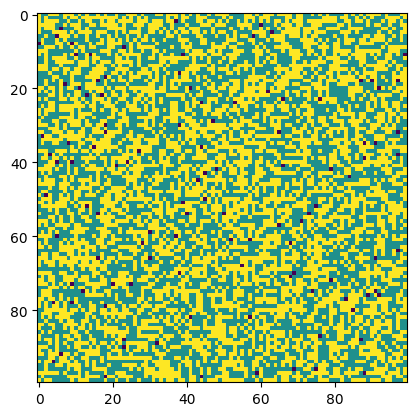

In [12]:
grid = sch.Init(100,100,0.01)
plt.imshow(grid)

In [63]:
def Q2(disp_unhappy=True,disp_initGraph=True):
  '''
  Runs 200 iterations of the schelling system for the following percentages of empty cells in a 100 x 100 space ['1%','0.1%','0.5%','5%','10%','25%'].
  Then displays an image of the final state of the system.
  '''
  pct, title_pct = [0.01,0.001,0.005,0.05,0.10,0.25], ['1%','0.1%','0.5%','5%','10%','25%']
  for i in range(6):
    grid = sch.Init(100,100,pct[i])
    if disp_initGraph:
      plt.imshow(grid)
      plt.title('Initial '+ title_pct[i]); plt.show()
    if disp_unhappy:
      U = sch.Unhappy(grid) # Check init unhappy
      print('Unhappy before', (U>=4).sum(), 'at ', pct[i])
    for n in range(200):
      sch.Iterate(grid)
    plt.imshow(grid)
    plt.title('After ' + title_pct[i]); plt.show()
    if disp_unhappy:
      U = sch.Unhappy(grid) # Check unhappy after 200 iterations
      print('Unhappy after', (U>=4).sum(), 'at ', pct[i])

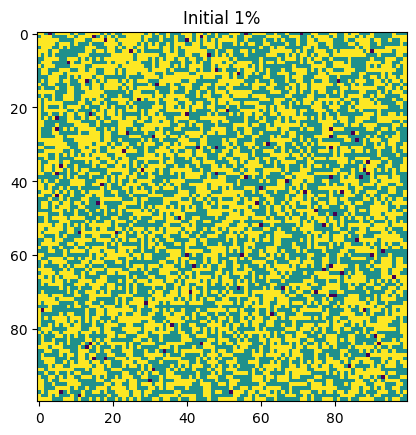

Unhappy before 6045 at  0.01


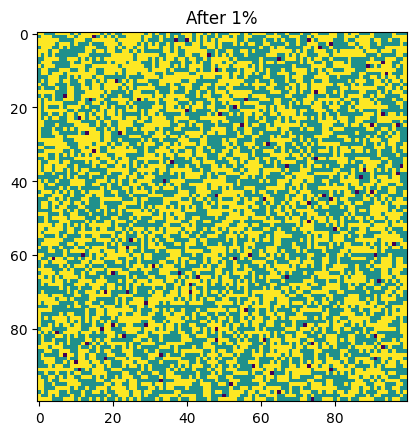

Unhappy after 5908 at  0.01


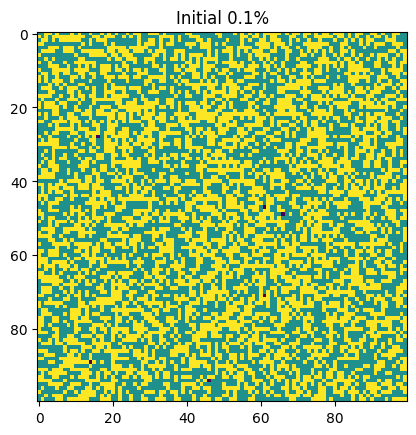

Unhappy before 6124 at  0.001


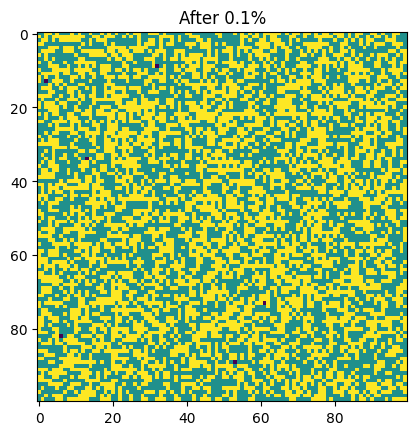

Unhappy after 5996 at  0.001


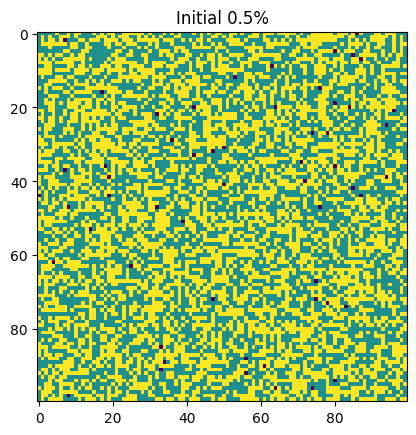

Unhappy before 6133 at  0.005


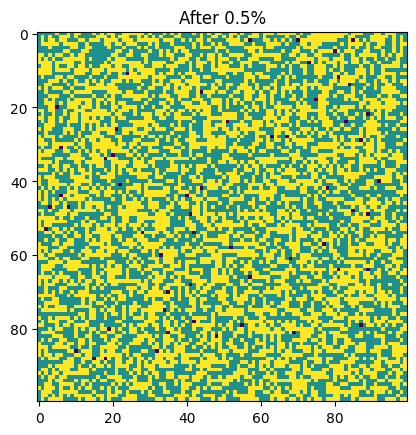

Unhappy after 6007 at  0.005


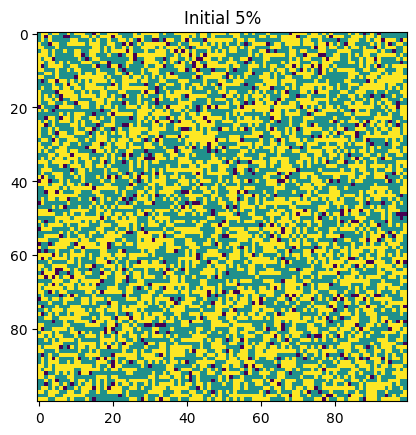

Unhappy before 5210 at  0.05


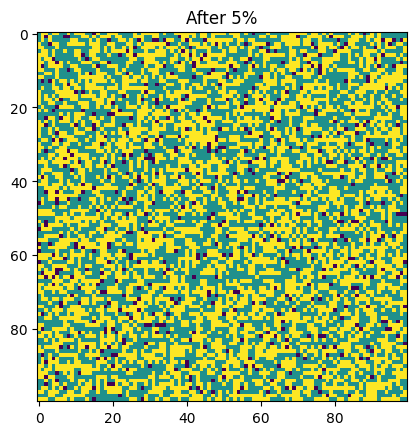

Unhappy after 5077 at  0.05


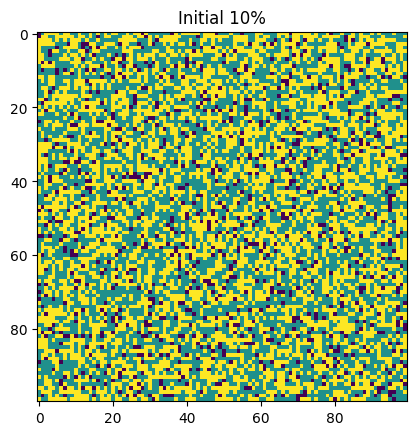

Unhappy before 4610 at  0.1


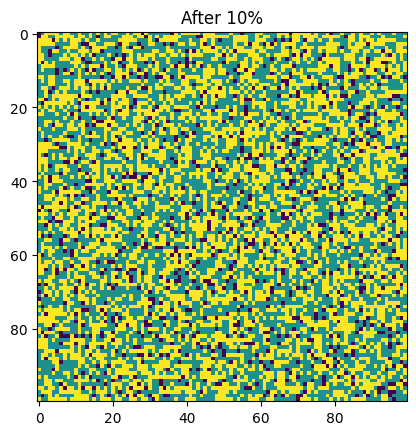

Unhappy after 4466 at  0.1


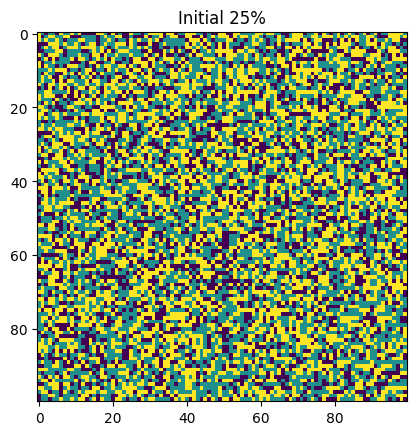

Unhappy before 2570 at  0.25


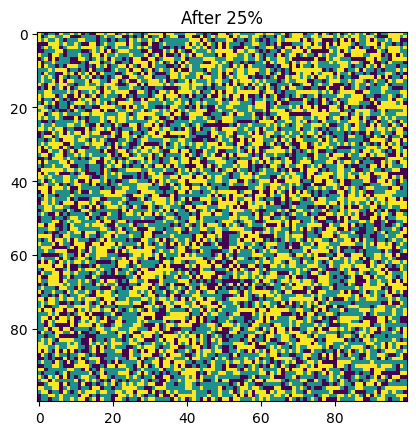

Unhappy after 2362 at  0.25


In [37]:
Q2()

## Problem 3

Consider a simulation which has 1 % empty cells in a $100 \times 100$ environment.  In the notes, simulations had two entities (cats and dogs) which had equal populations.  In this problem, create a simulation in which one entity is 90 % of the population and the other is only 10 % of the population.  Run the simulation for 150,000 iterations and show final grid as an image.


In [64]:
# your code goes here, show the final grid as an image

def init_90_10(V,H,pct):
  '''
  Redefine the threshholds for populating the grid so animal 1 is 90% of non empty cells and animal 2 is 10 % of non empty cells
  '''
  grid=np.zeros((V,H),int)
  # populate
  t1 = pct # first threshold
  t2 = (1-t1)*0.9 + t1 # second threshold, 90% animal 1, 10% animal 2
  r = np.random.rand(V,H)
  mask1 = (r>t1)*(r<=t2)
  mask2 = (r>t2)
  grid = grid + mask1 + mask2*2
  return grid

In [61]:
def Q3(N,tick=10000,disp_initGrid=True,status=True):
  '''

  '''

  grid = init_90_10(100,100,0.01) # Initialize grid
  #print((grid==1).sum()) # Check if animal 1 is 10% of populated cells

  if disp_initGrid:
    #Show initial grid
    plt.imshow(grid)
    plt.title('Initial'); plt.show()

  #Run simulation
  for i in range(N):
    sch.Iterate(grid)
    #Add ticker to tell how far the simulation is coming along
    if status:
      if (i+1) % tick == 0:
        print(f'{((i+1)/N)*100}% the way there.')

  #Output results
  plt.imshow(grid)
  plt.title('After'); plt.show()

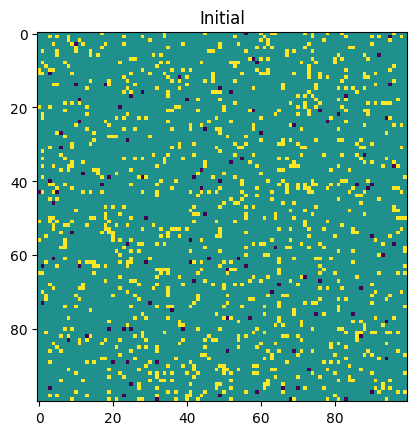

0.6666666666666667% the way there.
1.3333333333333335% the way there.
2.0% the way there.
2.666666666666667% the way there.
3.3333333333333335% the way there.
4.0% the way there.
4.666666666666667% the way there.
5.333333333333334% the way there.
6.0% the way there.
6.666666666666667% the way there.
7.333333333333333% the way there.
8.0% the way there.
8.666666666666668% the way there.
9.333333333333334% the way there.
10.0% the way there.
10.666666666666668% the way there.
11.333333333333332% the way there.
12.0% the way there.
12.666666666666668% the way there.
13.333333333333334% the way there.
14.000000000000002% the way there.
14.666666666666666% the way there.
15.333333333333332% the way there.
16.0% the way there.
16.666666666666664% the way there.
17.333333333333336% the way there.
18.0% the way there.
18.666666666666668% the way there.
19.333333333333332% the way there.
20.0% the way there.
20.666666666666668% the way there.
21.333333333333336% the way there.
22.0% the way the

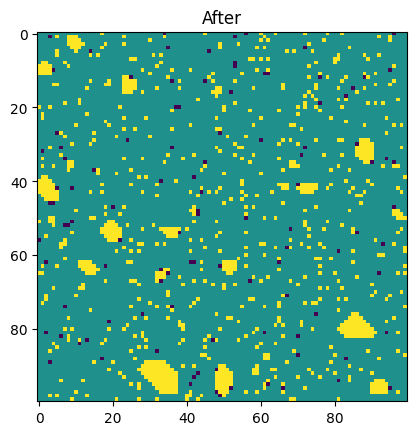

In [65]:
Q3(150000,50)

In [39]:
'''pct = 0.01

t1 = pct # first threshold
t2 = (1-t1)*0.9 + t1 # second threshold

print(t1, t2)'''

0.01 0.901


## Problem 4
The *time.time()* function will return the computer clock time in seconds.

One way of determining the run time of a program is to use
*t1 = time.time()*;
code;
*t2 = time.time();
print(t2-t1)*

How much times does it take to run 10,000 iterations for a $50 \times 50$ grid, a $100 \times 100$ grid, and a $200 \times 200$ grid?

In [67]:
# your code goes here, print the numerical answers for each grid
import time

def Q4(print_time=False,disp_plot=False):
  '''
  Finds how much time it takes to iterate 10000x on 50x50, 100x100, and 200x200 grids.
  Returns the time it takes for each n x n grid.
  '''

  VH = [50, 100, 200]
  time_result = dict()

  for i in range(3):
    t1 = time.time() #Start time

    grid = sch.Init(VH[i],VH[i],0.01)
    for x in range(10000):
      sch.Iterate(grid)

    if disp_plot:
      plt.imshow(grid)
      plt.title(VH[i]+ 'x' + VH[i]); plt.show()

    t2 = time.time()  #End time
    if print_time:
      print(str(VH[i])**2, ' needed', t2-t1, 'seconds')
    time_result[VH[i]] = t2 - t1

  return time_result

In [68]:
tms = Q4(True)
print(tms)

{50: 49.180466651916504, 100: 186.4243688583374, 200: 612.9110541343689}


## Problem 5
Use a simulation with $100 \times 100$ grid with 1 % empty spaces.  Count the number of dogs completely surrounded by other dogs after 0, 50, 100, 200, 400, 800, 1600, 6400,12800, and 25600 iterations.  Create a scatter plot that plots the number of competely surrounded dogs versus the number of iterations.

In [102]:
def count3x3(N, grid, x=2):
  '''
  Finds and counts 3x3 matrixes that are populated by a number x and returns the count
  '''
  cnt = 0
  for h in range(N-2):
    for v in range(N-2):
      matx3x3 = grid[h:h+3,v:v+3]
      if (matx3x3 == x).all():
        #print(matx3x3) #Verify
        cnt += 1
  return cnt

In [103]:
#test
'''g1 = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
g1 = np.array(g1).reshape((4,4))
print(g1)

print(count3x3(4,g1,2))'''

'g1 = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]\ng1 = np.array(g1).reshape((4,4))\nprint(g1)\n\nprint(count3x3(4,g1,2))'

0
50
100
200
400
800
1600
6400
12800
25600


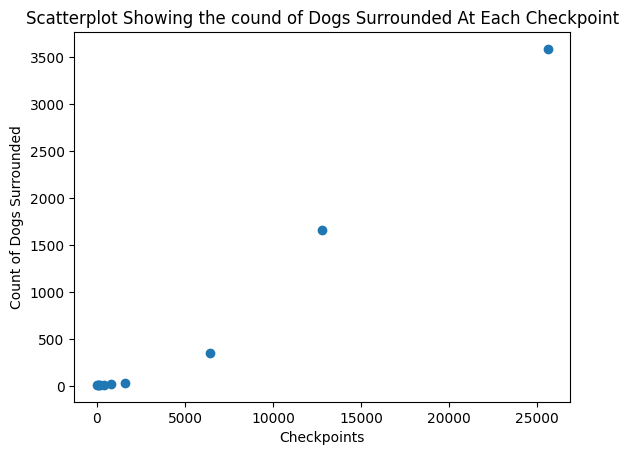

In [104]:
# your code goes here, show a scatter plot of the results

surrounded = list()
checkpoints = [0,50,100,200,400,800,1600,6400,12800,25600]

grid = sch.Init(100,100,0.01)

for i in range(25600+1):
  sch.Iterate(grid)
  if i in checkpoints:
    surrounded.append(count3x3(100,grid))
    print(i)

plt.scatter(checkpoints,surrounded)
plt.title('Scatterplot Showing the cound of Dogs Surrounded At Each Checkpoint')
plt.xlabel('Checkpoints'); plt.ylabel('Count of Dogs Surrounded')
plt.show()

## Problem 6
In the original program, we identified the unhappy animals and chose one at random to move to a new location.  In this problem, the approach is slightly altered.  Instead of picking one random unhappy animal, pick two.  Of these two, choose the animal whose position is to the left of the other.  Move this animal to an empty cell.  Use a $100 \times 100$ grid with 1 % empty cells.  Run for 25,000 iterations.  Show the final grid as an image.

In [179]:
def Move_Left_Unhappy(v,h,ev,eh,grid):
  '''
  Finds 2 unhappy animals, chooses the animal with a smaller H value, then moves that one.
  '''

  N = len(v)
  if N>0:
    while True:
      r1, r2 = np.random.randint(0,N), np.random.randint(0,N) #Randomly choose 2 animals
      animal1,animal2 = (v[r1],h[r1]),(v[r2],h[r2])
      if r1 != r2:
        if animal1[1] < animal2[1]:
          mover = animal1
          break
        elif animal2[1] < animal1[1]:
          mover = animal2
          break

    M = len(ev)
    me = np.random.randint(0,M)
    newloc = ev[me],eh[me]
    # move
    oldg = grid[newloc]
    grid[newloc] = grid[mover]
    grid[mover] = oldg

def Iterate_left(grid, gamma=4):
  u = sch.Unhappy(grid)
  v,h = sch.CollectGrumps(u,gamma)
  ev,eh = sch.FindEmpty(grid)
  Move_Left_Unhappy(v,h,ev,eh,grid)

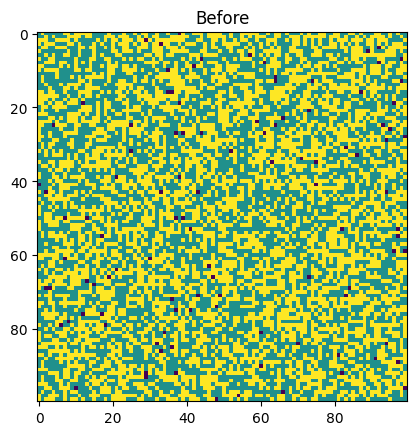

10.0% the way there.
20.0% the way there.
30.0% the way there.
40.0% the way there.
50.0% the way there.
60.0% the way there.
70.0% the way there.
80.0% the way there.
90.0% the way there.
100.0% the way there.


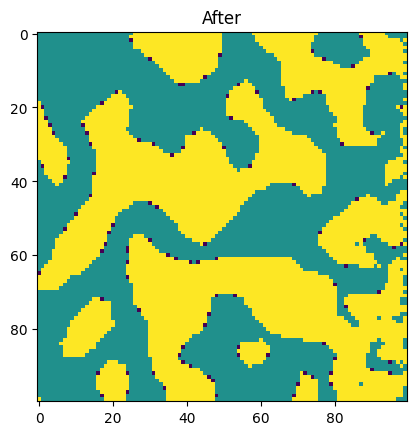

In [181]:
# your code goes here.  Show the final grid as an image
grid = sch.Init(100,100,0.01)

plt.imshow(grid)
plt.title('Before');plt.show()

N=25000
for i in range(N):
  Iterate_left(grid)
  if (i+1) % (N/10) == 0:
    print(f'{(i+1)/N*100}% the way there.')

plt.imshow(grid)
plt.title('After');plt.show()

## Problem 7

Build a Schelling model on a toroid surface, so that a cell on the left-most column sees cells along the right-most column as its neighbor, and vice versa.  The same idea applies to the top and bottom rows.  Fortunately, _numpy_ has a function that can help named *__numpy.roll__*.

For this simulation use a $100 \times 100$ grid with 1 % empty cells.  Run for 50,000 iterations, and how the final grid as an image.

In [24]:
# your code goes here, show the final grid as an image
import scipy.ndimage.interpolation as ndi
'''
Steps

Create + Populate Grid
Identify Unhappy Animals <<< Change this function to roll over x+y???
Choose Random Unhappy Animal To Move
Identify Empty Spaces
Move Random Animal To Empty Space
'''

import numpy as np
import scipy.ndimage as ndi

def Unhappy_toroid(grid):
    unhappy = np.zeros(grid.shape, int)
    shifts = ((-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1))
    for sh in shifts:
        rolled_grid = np.roll(grid, sh, axis=(0, 1))
        temp = grid != rolled_grid
        unhappy += temp * (rolled_grid != 0)
    unhappy *= (grid != 0)
    #print(unhappy)
    return unhappy

def Iterate_Toroid(grid, gamma=4):
    u = Unhappy_toroid(grid)
    v,h = sch.CollectGrumps(u,gamma)
    ev,eh = sch.FindEmpty(grid)
    sch.Move1Unhappy(v,h,ev,eh,grid)

20.0% complete
40.0% complete
60.0% complete
80.0% complete
100.0% complete


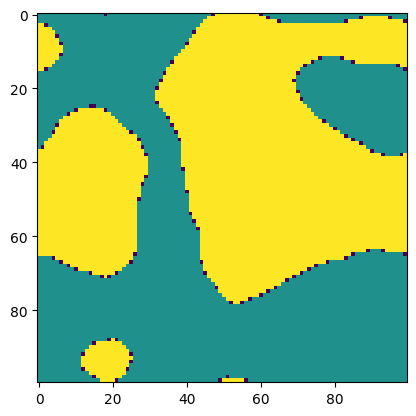

In [29]:
grid = sch.Init(100,100,0.01)

for i in range(50000):
  Iterate_Toroid(grid)
  if (i+1) % 10000 == 0:
    '''plt.plot(grid)
    plt.title(f'{(i+1)/10000}% complete');plt.show'''
    print(f'{(i+1)/50000*100}% complete')

plt.imshow(grid)
plt.show()

In [11]:
arr = np.array([x for x in range(25)]).reshape(5,5)

print(arr)

arr = np.roll(arr, (-1,0),axis=(0,1))

print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [ 0  1  2  3  4]]


In [12]:
grid = sch.Init(10,10,0.20)
print(grid)
Unhappy_toroid(grid)
rollover = np.roll(grid,(1,1),axis=(0,1))
print(grid,'\n',rollover)

[[2 2 1 1 2 0 1 2 1 1]
 [0 1 1 2 2 1 2 1 0 1]
 [0 1 0 0 1 1 1 1 0 1]
 [2 1 2 2 0 2 1 1 1 2]
 [1 0 1 2 2 1 2 1 1 2]
 [0 0 2 1 0 2 1 2 2 2]
 [1 2 2 1 1 1 0 0 1 2]
 [1 1 2 2 1 2 1 0 2 1]
 [2 2 1 2 1 1 1 0 2 2]
 [0 1 2 2 0 0 1 2 0 0]]
